<a href="https://colab.research.google.com/github/Tensai-Pro/SRI-PracticeTasks/blob/master/Word%20Embeddings/2)%20Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from gensim.utils import simple_preprocess
from gensim.models import Word2Vec

import nltk;
nltk.download('stopwords');
from nltk.corpus import stopwords;
from nltk.stem.snowball import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Practice Files/train.zip')
df.head(3)

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...


# Предобработка текста

In [ ]:
stopwords = stopwords.words('english')

In [ ]:
def prepare_text(text):
  tokens = simple_preprocess(text)
  stemmer = SnowballStemmer('english', ignore_stopwords=True)
  tokens = [stemmer.stem(tok) for tok in tokens if tok not in stopwords]
  return tokens

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.Description, df['Class Index'],
                                                    shuffle=True, random_state=42)

In [ ]:
X_train = X_train.apply(prepare_text)
X_test = X_test.apply(prepare_text)

In [ ]:
print(type(X_train.values))
print(X_train.shape)
print(X_test.shape)

<class 'numpy.ndarray'>
(90000,)
(30000,)


# Word2Vec обучение

In [ ]:
w2v_model = Word2Vec(X_train.values, vector_size=200, window=7,
                     min_count=10,
                     epochs=15, workers=4)

In [ ]:
w2v_model.estimate_memory()

{'vocab': 5070000, 'vectors': 8112000, 'syn1neg': 8112000, 'total': 21294000}

In [ ]:
len(w2v_model.wv)

10140

# Векторизация

In [ ]:
def vectorize(text, model=w2v_model):
    vectorized_text = np.array([model.wv[word] for word in text if word in model.wv])
    if len(vectorized_text) == 0:
        return np.zeros(100)
    return vectorized_text.mean(axis=0)

In [ ]:
# vectorize(X_train.values[0])

In [ ]:
X_train_vectorized = np.array([vectorize(sentence) for sentence in X_train])
X_test_vectorized = np.array([vectorize(sentence) for sentence in X_test])

# Классификация

## MultinomialNB

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train_vectorized)
X_test_scaled = scaler.transform(X_test_vectorized)

In [ ]:
clf_nb = MultinomialNB().fit(X_train_scaled, y_train)

In [ ]:
y_pred_nb = clf_nb.predict(X_test_scaled)

In [ ]:
acc_score = clf_nb.score(X_test_scaled, y_test) * 100
print(f'Accuracy: {acc_score}%')

Accuracy: 83.25%


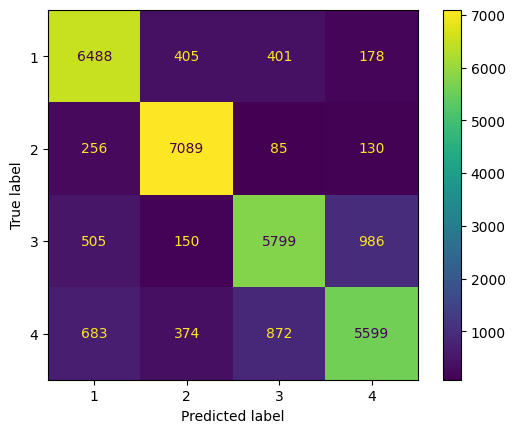

In [ ]:
cm_nb = confusion_matrix(y_test.values, y_pred_nb)
ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=clf_nb.classes_).plot();

## SVC

грузится миллион лет, и точность в итоге неоч

In [ ]:
# clf_rbf = SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train_vectorized, y_train)
# clf_poly = SVC(kernel='poly', degree=3, C=1).fit(X_train_vectorized, y_train)

In [ ]:
# y_pred_rbf = clf_rbf.predict(X_test_vectorized)
# y_pred_poly = clf_poly.predict(X_test_vectorized)

In [ ]:
# acc_score = clf_rbf.score(X_test, y_test) * 100
# print(f'Accuracy: {acc_score}%')

# acc_score = clf_poly.score(X_test, y_test) * 100
# print(f'Accuracy: {acc_score}%')

In [ ]:
# cm_rbf = confusion_matrix(y_test.values, y_pred_rbf)
# ConfusionMatrixDisplay(confusion_matrix=cm_rbf, display_labels=clf_rbf.classes_).plot();

In [ ]:
# cm_poly = confusion_matrix(y_test.values, y_pred_poly)
# ConfusionMatrixDisplay(confusion_matrix=cm_poly, display_labels=clf_poly.classes_).plot();

## K-Nearest Neighbor (KNN)

In [ ]:
clf_knn = KNeighborsClassifier(n_neighbors=15).fit(X_train_scaled, y_train)

In [ ]:
y_pred_knn = clf_knn.predict(X_test_scaled)

In [ ]:
acc_score = clf_knn.score(X_test_scaled, y_test) * 100
print(f'Accuracy: {acc_score}%')

Accuracy: 88.92333333333333%


In [ ]:
# from sklearn.model_selection import GridSearchCV

In [ ]:
# grid_search = GridSearchCV(KNeighborsClassifier(),
#                            {
#                               'n_neighbors':np.arange(2, 5),
#                             }, 
#                            cv=5, scoring="r2",verbose=1,n_jobs=-1
#                            )

# grid_search.fit(X_train_scaled, y_train)

In [ ]:
# grid_search.best_params_

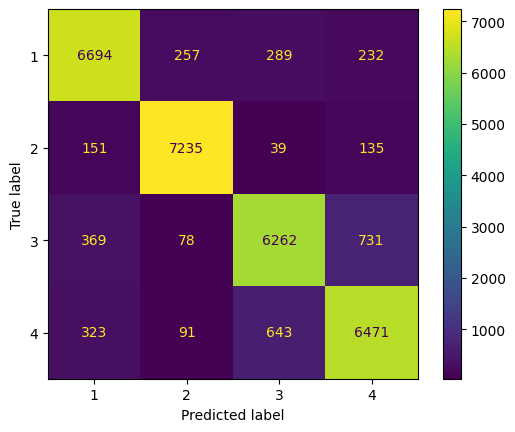

In [ ]:
cm_knn = confusion_matrix(y_test.values, y_pred_knn)
ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=clf_knn.classes_).plot();

# Атрибут sample

In [ ]:
def classify(X_train_vectorized, X_test_vectorized):
  # Multinomial NB
  print('Multinomial NB')
  scaler = MinMaxScaler()

  X_train_scaled = scaler.fit_transform(X_train_vectorized)
  X_test_scaled = scaler.transform(X_test_vectorized)

  clf_nb = MultinomialNB().fit(X_train_scaled, y_train)

  y_pred_nb = clf_nb.predict(X_test_scaled)

  acc_score = clf_nb.score(X_test_scaled, y_test) * 100
  print(f'Accuracy: {acc_score}%', end='\n\n\n')

  print('KNN')
  clf_knn = KNeighborsClassifier(n_neighbors=10).fit(X_train_scaled, y_train)
  
  y_pred_knn = clf_knn.predict(X_test_scaled)

  acc_score = clf_knn.score(X_test_scaled, y_test) * 100
  print(f'Accuracy: {acc_score}%')

In [ ]:
threshold_sample = np.arange(0, 0.00005, 0.00001)
threshold_sample

array([0.e+00, 1.e-05, 2.e-05, 3.e-05, 4.e-05])

In [ ]:
for i in range(len(threshold_sample)):
  w2v_model_test = Word2Vec(X_train.values, vector_size=200, window=7,
                     min_count=10, sample=threshold_sample[i],
                     epochs=15, workers=4)
  
  length = len(w2v_model_test.wv)
  print(length)

  if length == len(w2v_model.wv):
    continue
  else:
    X_train_vectorized = np.array([vectorize(sentence) for sentence in X_train])
    X_test_vectorized = np.array([vectorize(sentence) for sentence in X_test])
    
    classify(X_train_vectorized, X_test_vectorized)

10140
10140
10140
10140
10140
